In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("nelgiriyewithana/new-york-housing-market")

print("Path to dataset files:", path)

d:\Meus Documentos\Downloads\IC_MC\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 271k/271k [00:00<00:00, 547kB/s]

Extracting files...
Path to dataset files: C:\Users\User\.cache\kagglehub\datasets\nelgiriyewithana\new-york-housing-market\versions\1


In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv(r"D:\Meus Documentos\Downloads\IC_MC\data\NY-House-Dataset.csv")
data.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


In [22]:
data.describe()

,PRICE,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE
count,4.801000e+03,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000
mean,2.356940e+06,3.356801,2.373861,2184.207862,40.714227,-73.941601
std,3.135525e+07,2.602315,1.946962,2377.140894,0.087676,0.101082
min,2.494000e+03,1.000000,0.000000,230.000000,40.499546,-74.253033
25%,4.990000e+05,2.000000,1.000000,1200.000000,40.639375,-73.987143
50%,8.250000e+05,3.000000,2.000000,2184.207862,40.726749,-73.949189
75%,1.495000e+06,4.000000,3.000000,2184.207862,40.771923,-73.870638
max,2.147484e+09,50.000000,50.000000,65535.000000,40.912729,-73.702450


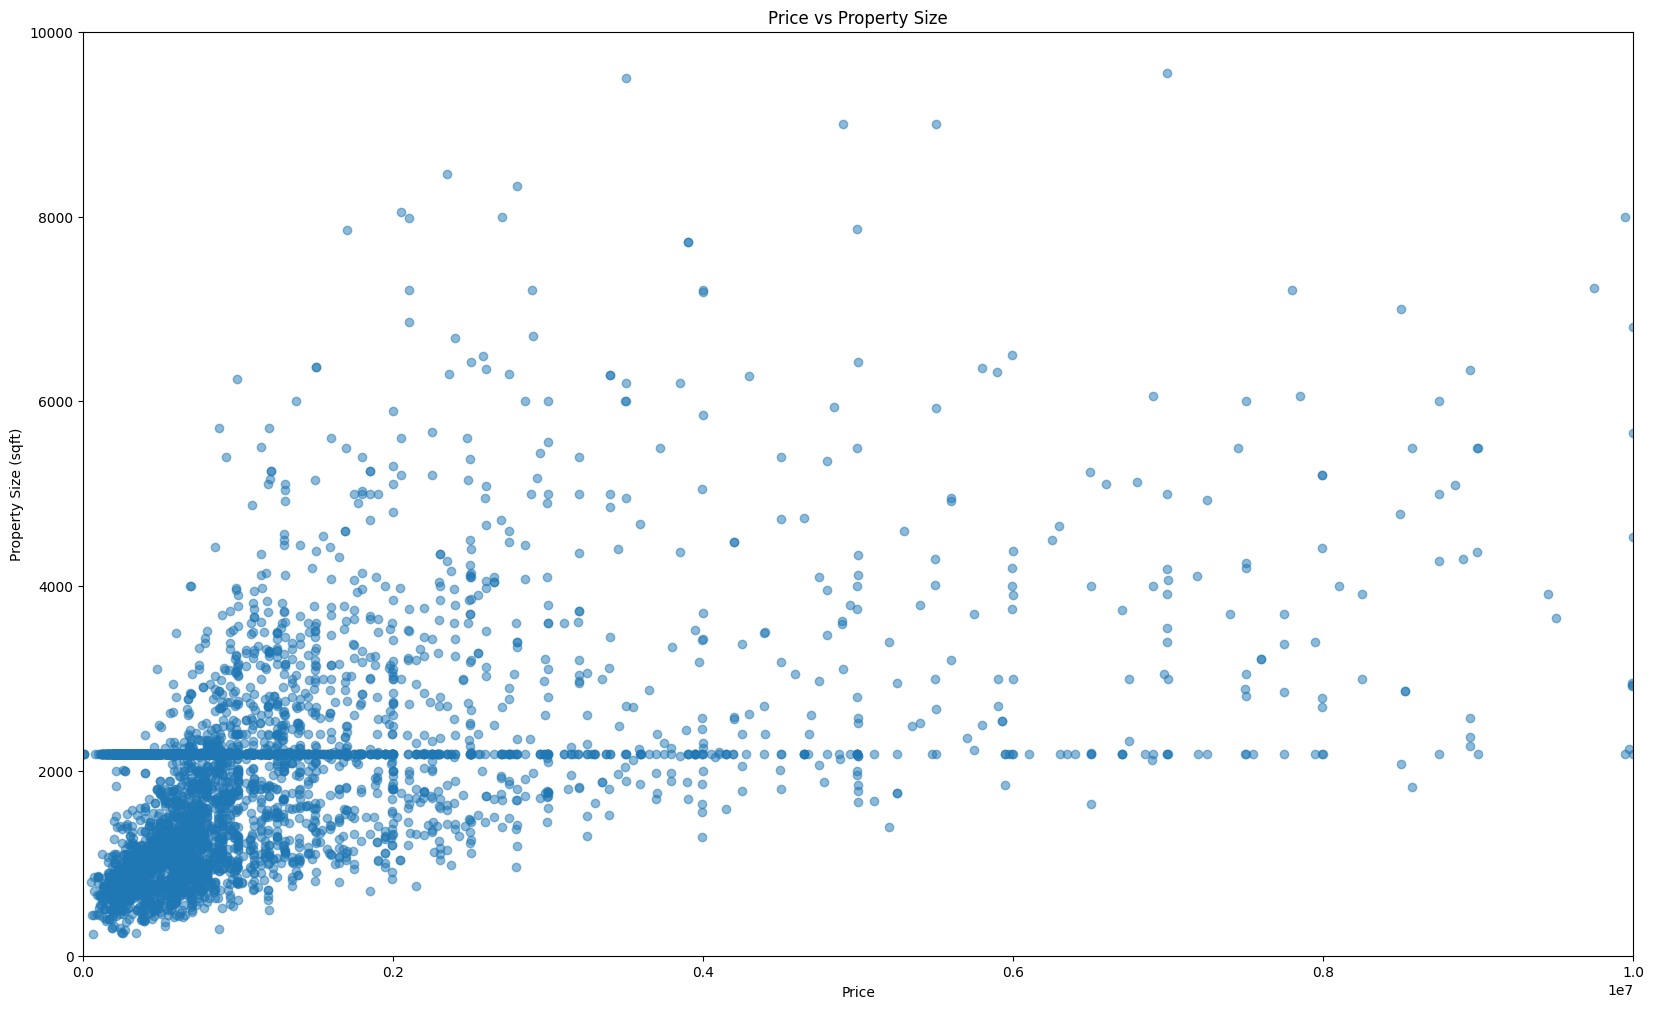

In [23]:
plt.figure(figsize=(20, 12))
plt.scatter(data['PRICE'], data['PROPERTYSQFT'], alpha = 0.5)
plt.title('Price vs Property Size')
plt.xlabel('Price')
plt.ylabel('Property Size (sqft)')
plt.xlim(0, 10000000)
plt.ylim(0, 10000)
plt.show()

In [ ]:
# --- 1. Create the same sample data as before ---
np.random.seed(42)
x_core = np.random.rand(100) * 10
y_core = 2 * x_core + 5 + np.random.randn(100) * 2
x_outliers = [15, 18, -5, -8]
y_outliers = [10, 5, 40, 35]
df = pd.DataFrame({
    'X_data': np.concatenate([x_core, x_outliers]),
    'Y_data': np.concatenate([y_core, y_outliers])
})

print(f"Original DataFrame shape: {df.shape}") # Shows (rows, columns)

# --- 2. Define the bounds for what you consider "not an outlier" ---
# Let's remove the top and bottom 2% of the data for 'X_data'.
lower_bound = df['X_data'].quantile(0.02)
upper_bound = df['X_data'].quantile(0.98)

print(f"\nKeeping X_data between {lower_bound:.2f} and {upper_bound:.2f}")

# --- 3. Create a new DataFrame without the outliers ---
# This new DataFrame only contains rows where 'X_data' is within our bounds.
df_no_outliers = df[(df['X_data'] >= lower_bound) & (df['X_data'] <= upper_bound)]

print(f"New DataFrame shape: {df_no_outliers.shape}")


# --- 4. Plot the new, cleaned data ---
plt.figure(figsize=(8, 6))
plt.scatter(df_no_outliers['X_data'], df_no_outliers['Y_data'])
plt.title('Plot After Removing Outliers from Data')
plt.xlabel('X Data')
plt.ylabel('Y Data')
plt.show()